In [49]:
import networkx as nx
import jsonlines
import numpy as np
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter

In [5]:
#get all interactions belonging to 2017 books

book_ids = []
#get all book ids from 2017 books file
with jsonlines.open('2017.json','r') as reader:
    for obj in reader:
        book_ids.append(obj["book_id"])


In [6]:
#iterate through interactions file
with jsonlines.open('goodreads_interactions_comics_graphic (1).json','r') as reader2:
    with jsonlines.open('2017Interactions.json','w') as writer:
        for obj2 in reader2: #book interactions
            if obj2["book_id"] in book_ids:
                writer.write(obj2)

Done!


In [7]:
#get all interactions with a rating bigger than 0 (rating of 0 indicates that book has not been rated)
with jsonlines.open('2017Interactions.json','r') as reader:
    with jsonlines.open('ratingfiltered.json', mode = 'w') as writer:
        for obj in reader:
            if obj["rating"] != 0:
                writer.write(obj)

done


In [10]:
#get all interactions where user read atleast two books
from collections import Counter

user_ids = []
with jsonlines.open('ratingfiltered.json','r') as reader:
    for obj in reader:
        user_ids.append(obj)
        
c = Counter(d["user_id"] for d in user_ids)
repeated_terms_dict = [d for d in user_ids if c[d["user_id"]] > 1]   

with jsonlines.open('repeated_interactions.json', mode = 'w') as writer:
    for each in repeated_terms_dict:
        writer.write(each)

done


In [11]:
#getting rid of all books that doesnt link to another book by a user.
book_ids = []
#get all book_ids from repeated_interactions file
with jsonlines.open('repeated_interactions.json','r') as reader:
    for obj in reader:
        book_ids.append(obj["book_id"])

#iterate through the 2017 book file and only choose books that are in repeated_interactions
with jsonlines.open('2017.json','r') as reader2:
    with jsonlines.open('filtered_books.json', mode = 'w') as writer:

        for obj2 in reader2: #book interactions
            if obj2["book_id"] in book_ids:
                writer.write(obj2)

Done!


In [ ]:
# Link books that have been read by the same users

G = nx.Graph()
temp1 = []
temp2 = []
count = 0
num = 35000

with jsonlines.open('filtered_data.json','r') as reader1:
    for obj1 in reader1:
        temp1.append(obj1)
        temp2.append(obj1)

for i in range(0, len(temp1)):
    count = count+1
    for j in range(i, len(temp2)):
        if ((temp1[i]["user_id"] == temp2[j]["user_id"]) & (temp1[i] != temp2[j])):
            if G.has_edge(temp1[i]["book_id"], temp2[j]["book_id"]):
                G[temp1[i]["book_id"]][temp2[j]["book_id"]]['weight'] += 1
            else:
                G.add_edge(temp1[i]["book_id"], temp2[j]["book_id"], weight = 1)
print(G)

In [42]:
DClist = ["DC Comics","DC","DC Comics BOOM! Studios","DC Comics and Dynamite","Dc Comics","Dc Comics, BOOM Studios","DC Comics and Archie Comics","DC Comics/ Dark Horse","DC Comics and IDW Publishing","ECC Ediciones (El Catalogo del Comic, DC Comics)"] #all books published by DC
Mlist =  ["Marvel","Marvel Comics","Marvel Press","MARVEL"] #all books published by Marvel
KGGlist = ['Elex Media Komputindo', 'M & C','Level Comics','PT Gramedia (m&c!)', 'PT. Gramedia Pustaka Utama - M&C!','Level Comic','Elex Media Forum','m&c', 'm&c!','PT. Gramedia Pustaka Utama - M&C','PT. Elex Media Komputindo']
HitotsubashiGroup = ['VIZ Media LLC', 'Ji Ying She', "VIZ Media - Children's", 'Shueisha','Shogakkan','Viz Media', 'VIZ Media: SHONEN JUMP','Ji Ying She  / Shueisha']
Kodansha = ['Kodansha Comics', 'Kodansha','Jiang Tan She  / Kodansha','Jiang Tan She']
Panini = ['Panini Mexico','Panini Comics','Panini','panini mexico','Panini mexico','Panini Manga']
Sergio_Bonelli_Editore = ['Sergio Bonelli Editore','Sergio Bonelli']
Image = ['Image','Image Comics']
Holtzbrinck_Publishing_Group = ['Farrar, Straus and Giroux (BYR)', 'Faber  Faber', 'Henry Holt and Co. BYR Paperbacks', 'Henry Holt and Co. (BYR)', 'Metropolitan Books', 'Roaring Brook Press', 'First Second']
Scholastic_Corporation = ['Scholastic Press', 'Graphix', 'Scholastic Inc.', 'Scholastic Paperbacks', 'Graphix/Scholastic', 'Scholastic/Graphix', 'Scholastic']
Penguin_Random_House = ['Crown Books for Young Readers', 'Ten Speed Press', 'Watson-Guptill', 'Alfred A. Knopf Books for Young Readers', 'Doubleday Childrens', 'Pantheon Books', 'Penguin', 'Tarcherperigee', 'Plume Books', 'Viking Books for Young Readers', 'Dial Books', 'Razorbill', 'Random House Books for Young Readers']
NBM_Publishing = ['NBM Publishing', 'Papercutz']
IDW_Publishing = ['IDW Publishing', 'Top Shelf Productions']
BOOM_Studios = ['BOOM! Studios', 'BOOM! Box', 'KaBOOM!', 'Archaia', 'Boom! Box']
Carlsen = ['Carlsen', 'Carlsen Manga','Carlsen Verlag','Carlsen Comics','Carlsen']
Tokyopop = ['TokyoPop', 'Tokyopop','TOKYOPOP']
IPM = ['IPM','IPM & NXB Hoi Nha Van','IPM & NXB Van Hoc','NXB Tre','Nxb Tre']
ECC = ['ECC Ediciones', 'ECC Comics', 'ECC','Salvat - ECC Comics','Salvat - ECC' ]
Dark_Horse = ['Dark Horse Books','Dark Horse','Dark Horse Originals','Dark Horse Comics','Dark Planet']

#For each node, find book id in file and add to nodes the attribute average rating,publisher,shelf,title
listOfNodes = list(G.nodes)
with jsonlines.open('filtered_books.json','r') as reader3:
    for obj3 in reader3:
        for each in listOfNodes:
            if obj3["book_id"] == each: #add attributes we need to node
                G.nodes[each]["shelf"] = obj3["popular_shelves"]
                G.nodes[each]["average_rating"] = obj3["average_rating"]
                G.nodes[each]["title"] = obj3["title"] #add book name
                G.nodes[each]["language"] = obj3["language_code"]
                G.nodes[each]["format"] = obj3["format"]
                if obj3["publisher"] in DClist:
                    G.nodes[each]["publisher"] = "DC"
                elif obj3["publisher"] in Mlist: 
                    G.nodes[each]["publisher"] = "Marvel"
                elif obj3["publisher"] in KGGlist: 
                    G.nodes[each]["publisher"] = "Kompas Gramedia Group"
                elif obj3["publisher"] in HitotsubashiGroup: 
                    G.nodes[each]["publisher"] = "Hitotsubashi Group"
                elif obj3["publisher"] in Kodansha: 
                    G.nodes[each]["publisher"] = "Kodansha"
                elif obj3["publisher"] in Panini: 
                    G.nodes[each]["publisher"] = "Panini Comic"
                elif obj3["publisher"] in Sergio_Bonelli_Editore: 
                    G.nodes[each]["publisher"] = "Sergio Bonelli Editore"
                elif obj3["publisher"] in Image: 
                    G.nodes[each]["publisher"] = "Image Comic"
                elif obj3["publisher"] in Holtzbrinck_Publishing_Group: 
                    G.nodes[each]["publisher"] = "Holtzbrinck Publishing Group"
                elif obj3["publisher"] in Scholastic_Corporation: 
                    G.nodes[each]["publisher"] = 'Scholastic Corporation'
                elif obj3["publisher"] in Penguin_Random_House: 
                    G.nodes[each]["publisher"] = 'Penguin Random House'
                elif obj3["publisher"] in NBM_Publishing: 
                    G.nodes[each]["publisher"] = 'NBM Publishing'
                elif obj3["publisher"] in IDW_Publishing: 
                    G.nodes[each]["publisher"] = 'IDW Publishing'
                elif obj3["publisher"] in BOOM_Studios: 
                    G.nodes[each]["publisher"] = 'BOOM Studios' 
                elif obj3["publisher"] in Carlsen: 
                    G.nodes[each]["publisher"] = 'Carlsen' 
                elif obj3["publisher"] in Tokyopop: 
                    G.nodes[each]["publisher"] = 'Tokyo Pop' 
                elif obj3["publisher"] in IPM: 
                    G.nodes[each]["publisher"] = 'IPM' 
                elif obj3["publisher"] in ECC: 
                    G.nodes[each]["publisher"] = 'ECC Comic'
                elif obj3["publisher"] in Dark_Horse: 
                    G.nodes[each]["publisher"] = 'Dark Horse Comic'
                else:
                    G.nodes[each]["publisher"] = obj3["publisher"]
        
                
#Add genre using shelves
genres= ["fantasy","horror","romance","mystery","adventure","action","comedy","humour","childrens","superhero"]

#count = 0
for node1 in G:
    for l in G.nodes[node1]["shelf"]:
        if l["name"] in genres:
            G.nodes[node1]["genre"] = l["name"]
            #count+=1
            break
        else:
            G.nodes[node1]["genre"] = "N/A"
print("d")

d


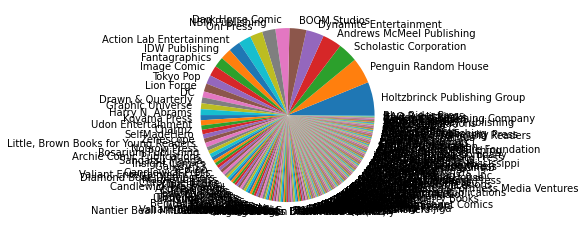

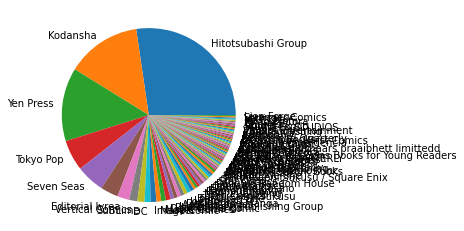

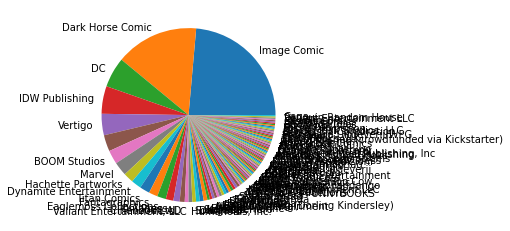

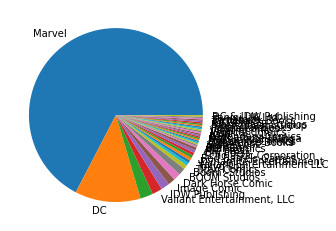

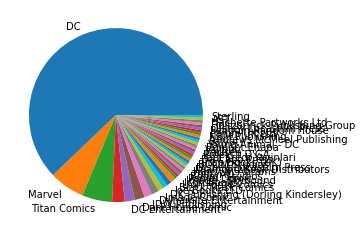

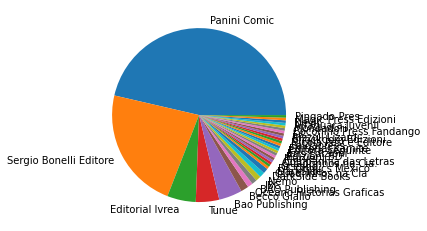

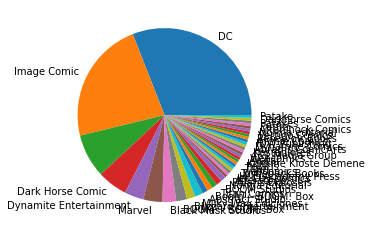

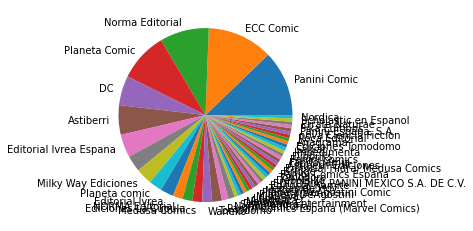

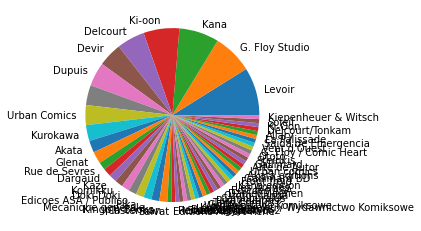

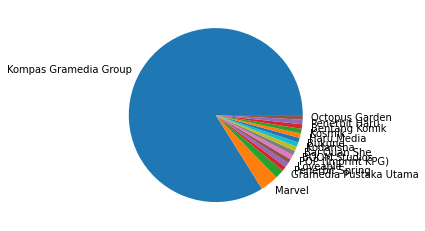

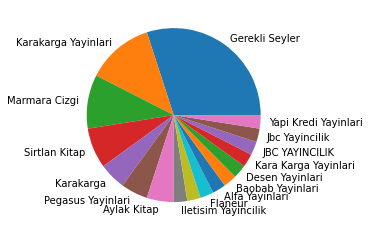

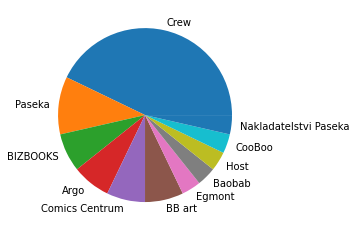

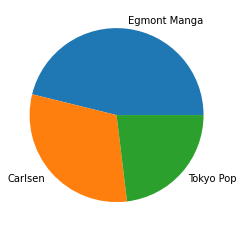

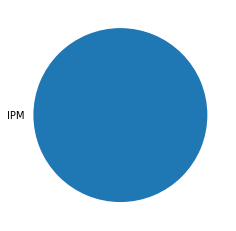

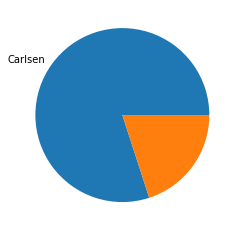

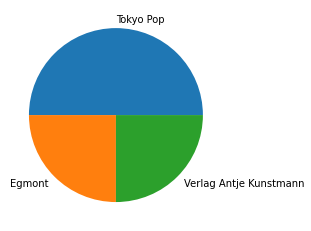

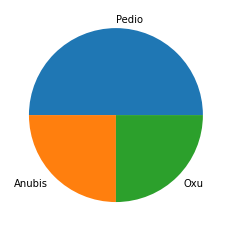

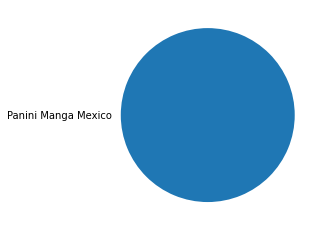

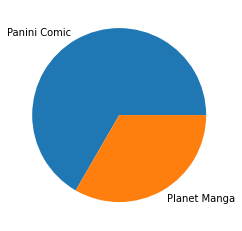

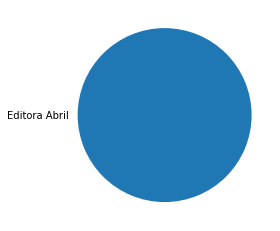

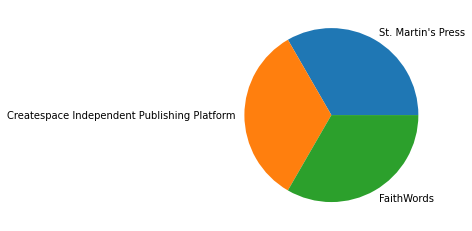

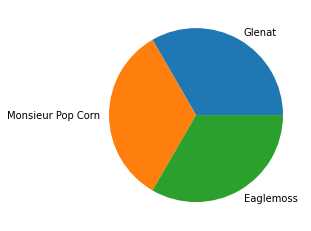

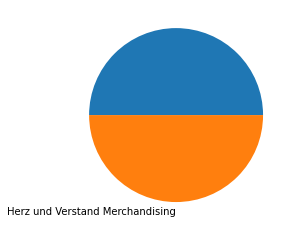

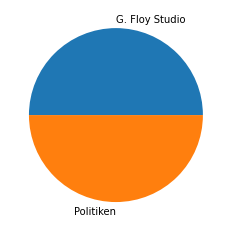

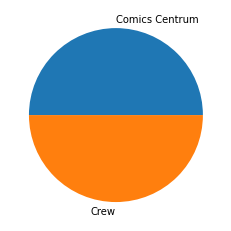

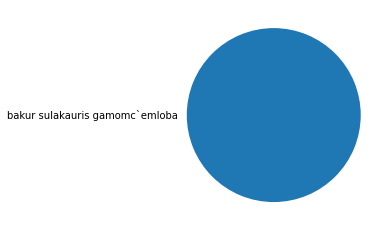

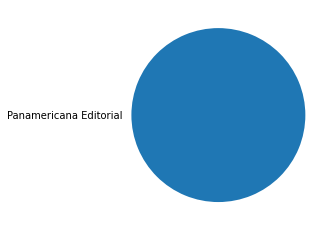

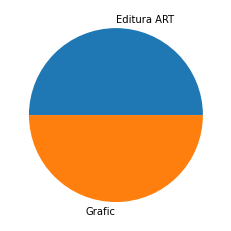

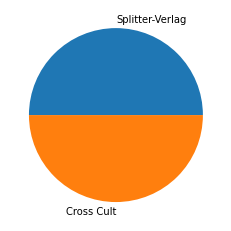

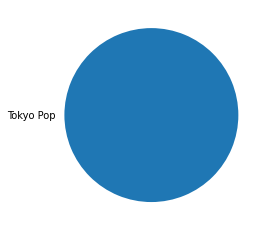

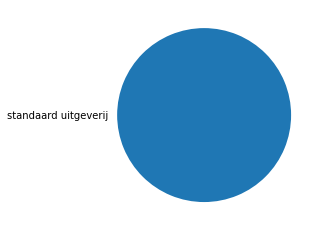

Done


In [43]:
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
#Run community detection on the network
network_comm = nx_comm.louvain_communities(G)

communitySize= len(network_comm)
orderedCommunSize = network_comm.sort(key=len, reverse=True)

#Add community as attribute for each node
for i in range(communitySize-1):
    for eachnodeinC in network_comm[i]:
        G.nodes[eachnodeinC]["community"] = i

seen_publisher = {}
seen_genres = {}


for i in range(communitySize-1):
    for node in network_comm[i]:
        if G.nodes[node]["publisher"] not in seen_publisher:
            seen_publisher[G.nodes[node]["publisher"]] = 1
        else:
            seen_publisher[G.nodes[node]["publisher"]] += 1
    
    #Reference StackOverflow to order dictionary in descending order
    #https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
    sortedseen = dict(sorted(seen_publisher.items(), key=lambda item: item[1],reverse=True))
    
    #Referenced W3Schools to generate pie charts
    #https://www.w3schools.com/python/matplotlib_pie_charts.asp
    plt.pie(list(sortedseen.values()), labels = sortedseen.keys())
    plt.show()
    
    sortedseen.clear()
    seen_publisher.clear()




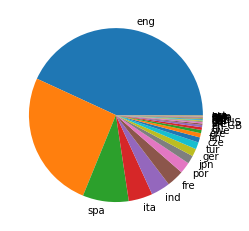

{'eng': 1363, '': 812, 'spa': 270, 'ita': 141, 'ind': 112, 'fre': 101, 'por': 66, 'jpn': 48, 'ger': 45, 'tur': 41, 'cze': 30, 'fin': 25, 'gre': 19, 'swe': 16, 'nl': 14, 'en-GB': 8, 'vie': 8, 'en-US': 5, 'pol': 5, 'srp': 4, 'dan': 4, 'nob': 3, 'rus': 3, 'fil': 2, 'nor': 2, 'msa': 2, 'ben': 2, 'kat': 2, 'rum': 2, 'ukr': 1, '--': 1, 'scr': 1, 'ara': 1, 'est': 1}
Done


In [46]:
#iterate through each community
seen_languages = {}

for i in range(communitySize-1):
    for node in network_comm[i]:
        if G.nodes[node]["language"] not in seen_languages:
            seen_languages[G.nodes[node]["language"]] = 1
        else:
            seen_languages[G.nodes[node]["language"]] += 1

sortedseenL = dict(sorted(seen_languages.items(), key=lambda item: item[1],reverse=True))

#Referened W3Schools to generate pie charts
#https://www.w3schools.com/python/matplotlib_pie_charts.asp
plt.pie(list(sortedseenL.values()), labels = sortedseenL.keys())
plt.show()

print(sortedseenL)
print("Done")

In [47]:
seen_genres = {}

for i in range(communitySize-1):
    for node in network_comm[i]:
        if G.nodes[node]["genre"] not in seen_genres:
            seen_genres[G.nodes[node]["genre"]] = 1
        else:
            seen_genres[G.nodes[node]["genre"]] += 1

#Reference StackOverflow to order dictionary in descending order
#https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
sortedseenG = dict(sorted(seen_genres.items(), key=lambda item: item[1],reverse=True))

print(sortedseenG)
print("Done")

{'N/A': 1003, 'fantasy': 820, 'superhero': 307, 'horror': 272, 'romance': 216, 'mystery': 134, 'adventure': 109, 'childrens': 101, 'humour': 86, 'action': 71, 'comedy': 41}
Done


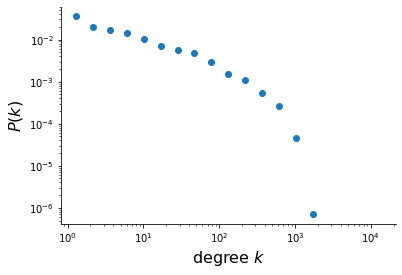

In [50]:
#=======Code below from CPSC 572 lectures workbook titled: networkx-W3L5.ipynb=========#

#Function to plot a degree distribution graph (P(k) vs k graph)
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

plot_degree_dist(G)

Number of nodes:  3162
Number of edges:  271107

Average degree:  171.47817836812143
Average degree (alternate calculation) 171.47817836812143

Minimum degree:  1
Maximum degree:  1733
Value of u is:  -0.7024068137984424


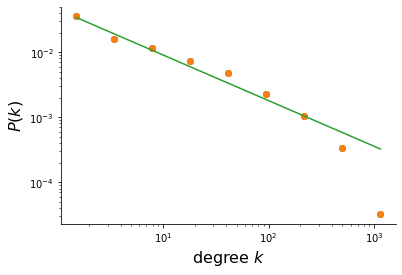

In [57]:
#=======Code below from CPSC 572 tutorial workbook titled: Degree_Correlation_Activities.ipynb=========#

from scipy.optimize import curve_fit
N = len(G) #num of nodes
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin and density is y
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.loglog(x, density, marker='o', linestyle='none')

plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

def func(k, a, u):
    return a*(k**u)

popt, _ = curve_fit(func, x, density)
a, u = popt
print("Value of u is: ", u)
ax.plot(x, func(x, *popt), label="Value of u = {0}".format(u))

    
plt.show()

In [58]:
#=======Code below from CPSC 572 lectures workbook titled: Scale_Free_Networks_W5L10.ipynb=========#

NCC = nx.number_connected_components(G)
C = np.mean(list(nx.clustering(G).values()))
CC = list(nx.connected_components(G))
#CCC = nx.connected_components(G)
#d = nx.shortest_path_length(G,weight=None)

components = sorted(CC, key=len, reverse=True)
H = G.subgraph(components[0])

randomnodes= [np.random.choice(H, size=2, replace=False) for _ in range(100)]

list2 =[]
for pair in range (0,len(randomnodes)-1):
    H1 = randomnodes[pair][0]
    H2 = randomnodes[pair][1]
    d=nx.shortest_path_length(H,H1,H2)
    list2.append(d)

print("Average shortest path: ", np.average(list2))
#d = nx.average_shortest_path_length(H)
#e = nx.average_shortest_path_length(H)

print("Number of connect components:", NCC)
print("Average Clustering Coefficient: ", C)
#print("Number of connected comp",CC)

#print(CCC)
#print("Shortest Path: ", avg)
#print(nx.average_shortest_path_length(G))



2.3737373737373737
Number of connect components: 16
Average Clustering Coefficient:  0.6808823138677834


In [ ]:
#=======Code below from CPSC 572 lectures workbook titled: Real World Networks - Null Models Exercise.ipynb=========#

#Create double edge swapped null model using unweighted network()

DP = G.copy()

clustering_DP = []
short_path_DP = []
connected_comp_DP = []

for i in range(100): 
    nx.double_edge_swap(DP,nswap=G.number_of_edges(),max_tries=10000000)
    C_DP = np.mean(list(nx.clustering(DP).values()))
    CC_DP = nx.number_connected_components(DP)
    if nx.is_connected(DP)==True:
        d_DP = nx.average_shortest_path_length(DP,weight=None)
    clustering_DP.append(C_DP)
    short_path_DP.append(d_DP)
    connected_comp_DP.append(CC_DP)
    
print(np.mean(clustering_DP))
print(np.std(clustering_DP))

print(np.mean(short_path_DP))
print(np.std(short_path_DP))

print(np.mean(connected_comp_DP))
print(np.std(connected_comp_DP))


In [61]:
#Most popular sub-genre

sum_each_node = {} #where key = node number and value = sum of weighted edges

#1. get sum of all weights of edges of a node
for each_edge in G:
    each_node = G.degree[each_edge]
    sum_each_node[each_edge] = each_node

#Reference StackOverflow to order dictionary in descending order
#https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
sortedEachNode = dict(sorted(sum_each_node.items(), key=lambda item: item[1],reverse=True))
    
    
#2. get the five highest and thats the most popular sub-genre
for i in range(5):
    getnode = list(sortedEachNode.keys())[i]
    print(G.nodes[getnode]["title"])
    print(G.nodes[getnode]["genre"])
    print("\n")

Saga, Vol. 7 (Saga, #7)
fantasy


Big Mushy Happy Lump (Sarah's Scribbles, #2)
humour


Snotgirl, Vol. 1: Green Hair Don't Care
mystery


Batman, Volume 1: I Am Gotham
superhero


Wonder Woman, Volume 1: The Lies
fantasy




In [63]:
#Most popular DC or Marvel
Published_DC_Books = ["DC"] #all books published by DC
Published_Marvel_Books = ["Marvel"] #all books published by Marvel

DC_Books = []
Marvel_Books = []

#1. get all DC and Marvel books in network
for eachnode5 in G:
    if G.nodes[eachnode5]["publisher"] in Published_DC_Books:
        DC_Books.append(eachnode5)
    elif G.nodes[eachnode5]["publisher"] in Published_Marvel_Books:
        Marvel_Books.append(eachnode5)

#2. get sum of weighted edges
sum_each_node_DC = {}
totalBooks = {}

for each_books1 in DC_Books:
    each_node_DC = G.degree[each_books1]
    sum_each_node_DC[each_books1] = each_node_DC

sum_each_node_marvel = {}
for each_books2 in Marvel_Books:
    each_node_marvel = G.degree[each_books2]
    sum_each_node_marvel[each_books2] = each_node_marvel

#Reference StackOverflow to order dictionary in descending order
#https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
sortedEachNodeDC = dict(sorted(sum_each_node_DC.items(), key=lambda item: item[1],reverse=True))
sortedEachNodeMarvel = dict(sorted(sum_each_node_marvel.items(), key=lambda item: item[1],reverse=True))

totalDC = sortedEachNodeDC.values()
print(sum(totalDC))
totalMarvel = sortedEachNodeMarvel.values()
print(sum(totalMarvel))

80952
107518


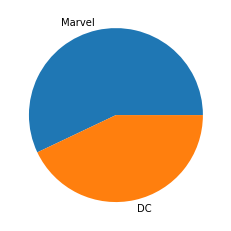

In [64]:
#Generate pie chart for most popular superhero universe books
DcMarvel = {"Marvel":107518,"DC":80952}

plt.pie(list(DcMarvel.values()), labels = DcMarvel.keys())
plt.show()

samePublisher:  351474
differentPublisher:  821848
total:  1173322
29.955459797054857 % of users have same publishers


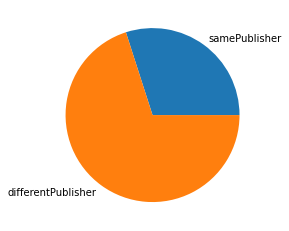

In [66]:
#check all neightbors of n and then check if publisher attribute is equal, if it is yes then add the weight of
#node and neighbour to samePublisher else add to differentPublisher instead
listOfNodes = list(G.nodes)
samePublisher = 0;
differentPublisher = 0;
for node in listOfNodes:
    for neighbour in G.neighbors(node):
        if (G.nodes[node]["publisher"] == G.nodes[neighbour]["publisher"]):
            samePublisher = samePublisher + G[node][neighbour]["weight"]
        else:
            differentPublisher = differentPublisher + G[node][neighbour]["weight"]


total = samePublisher + differentPublisher
percentage = (samePublisher/ total)*100
print("samePublisher: ", samePublisher )
print("differentPublisher: ", differentPublisher)
print("total: ", total)
print(percentage, "% of users have same publishers")

totalbooks = {'samePublisher': 351474, 'differentPublisher': 821848}
plt.pie(list(totalbooks.values()), labels = totalbooks.keys())
plt.show()